In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from chromalab.observer import Observer, Cone
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import MaxDisplayBasis
from chromalab.visualizer import PSWrapper, DisplayBasisType

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [21]:
wavelengths = np.arange(400, 701, 5)
d65 = Illuminant.get("D65")
trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
maxbasis_display = MaxDisplayBasis(trichromat, True)
viz = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.BOTH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)

100%|██████████| 58/58 [00:00<00:00, 605.47it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


(450, 535, 600)


100%|██████████| 3660/3660 [00:06<00:00, 539.00it/s]


In [6]:
full_colors, full_rgbs = trichromat.get_full_colors()

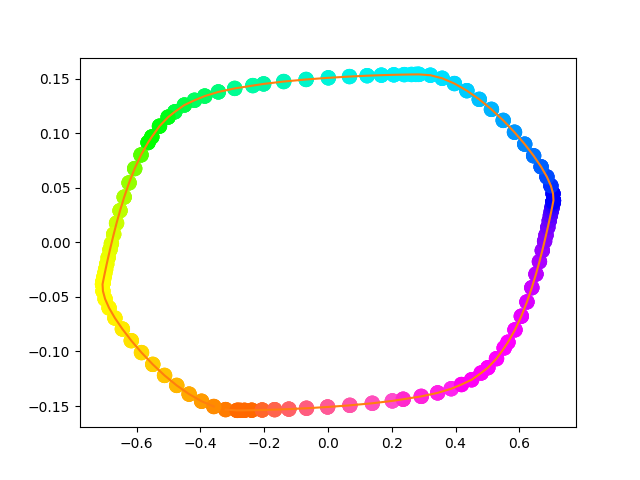

In [20]:
plt.scatter(full_colors[:, 0], full_colors[:, 1], c=full_rgbs, s=100)
plt.plot(full_colors[:, 0], full_colors[:, 1])
plt.show()